Projekt ma za zadanie zautomatyzować proces kwalifikalności klienta starającego się o udzielenie kredytu hipotecznego. Kwalifikacja ma odbywać się na podstawie danych klienta podanych we wniosku online. We wniosku należy wypełnienić dane: płeć, wiek, stan cywilny, liczba osób na utrzymaniu,dochód , kwota kredytu, historia kredytowa i inne dane. Instytucja bankowa dostarcza dane historyczne umożliwiające segmentację klientów, którzy kwalifikują się do udzielenia pożyczki - do których można kierować reklamy dotyczące możliwości jej udzielenia .

W projekcie korzysta się z następujących danych: 
Status pożyczki:
Loan_ID	Unikalny identyfikator kredytu
Plec	Mezczyzna/Kobieta
Zonaty	Yes/No
Il_osob	Liczba podopiecznych
Edukacja	wyższe/srednie
Samozatrudniony	Yes/No
Wnioskodawca_dochod	Dochod wnioskodawcy
Coappliciant_dochod	
Kwota_kredytu	Kwota poźyczki w tys.
Loan_amount_term	Okres kredytu w m-cach
Historia_kredyt	historiakredytowa spelnia wytyczne
Property_Area	miasto/miasteczko/wieś
Loan_Status	Kredyt zatwierdzony(Yes/No)

Format pliku zgloszenia: 
Loan_ID: Unikalny identyfikator kredytu
Loan_Status:Kredyt zatwierdzony (Yes/No)


In [ ]:
1. Stwierdzenie problemu
2. Tworzenie hipotez
3. Przygotowanie systemu
4. Ładowanie danych
5.EDA (eksploracyjna analiza danych)
- analiza jednowymiarowa
- analiza dwuwymiarowa (bivariate analysis)
6. Brak wartosci i wartosci odstajace
    

## 1  Problem klasyfikacyjny, gdzie musimy przewidzieć czy kredyt zostanie udzielony czy nie. Musimy przewidzieć wartości dyskretne na podstawie zmiennych niezależnych.
-Klasyfikacja binarna : np czy klient to kobieta czy meżczyzna
-Klasyfikacja wieloklasowa : czy mieszka w mieście, małym mieście czy na wsi

In [ ]:
## 2 Tworzenie hipotez- zrozumienie problemu przed spojrzeniem na dane.
Czynniki mające wpływ na zatwierdzenie kredytu:
    1. dochód
    2. historia
    3. kwota kredytu
    4. okres kredowania
    5. EMI - im mniejsza kwota miesiecznej spłaty tym wieksza szansa na zatwierdzenie kredytu

In [ ]:
## 3. wykorzystywać będziemy : Pyton, Pandas, Mathplotlib, NumPy,Seaborn, Sclearn oraz worning (aby ignorować )

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [ ]:
## 4 Dane do wczytania w formacie csv , podzielono na 2 zestawy: treningowy i testowy 

In [10]:
train = pd.read_csv("train_ctrUa4K.csv")

test = pd.read_csv("test_lAUu6dG.csv")


In [12]:
# dla bezpieczenstwa danych robimy kopie, na ktorych bedziemy pracowac
train.original = train.copy() 
test.original = test.copy()

In [14]:
train.columns  # 12 zmiennych niezależnych i 1 zmienna docelowa -Loan_Status


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
test.columns # 12 zmiennych niezaleznych

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [16]:
train.dtypes # sprawdzamy typy danych: 3 typy:obiect-zmienne kategoryczne, int64-zmienna całkowita, float64 - dane zmiennoprzecinkowe

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
train.shape,  test.shape   # kształt danych

((614, 13), (367, 12))

## 5 EDA 
analiza jednowymiarowa

In [19]:
# Loan_Status - badamy liczbę kategorii zmiennej Y/N
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
#normalizujemy Loan_Status-liczbe kategorii, aby zobaczyć proporcje Y/N
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

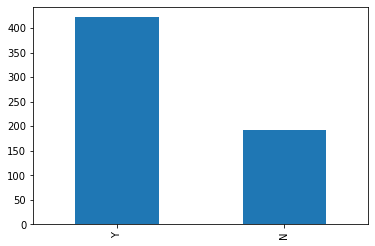

In [25]:
# wizualizacja na wykresie słupkowym
train['Loan_Status'].value_counts().plot.bar()

In [ ]:
# Wnioski-Loan_Status - około 69% kredytów zostało przyznanych (422/614)-Y

#### Wykonujemy wykresy słupkowe dla pozostałych zmiennych, dzieląc zmienne wg ich kategori - cech , na 3 grupy: 
categorical features (cechy kategorialne): Gender, Married, Self_Employed, Credit_History, Loan_Status

ordinal features (porządkowe):Dependents, Education, Property_Area

numerical features(liczbowe):ApplicantIncome, CoapplicantIncome, LoanAmount, LoanAmount_Term

### visualization categorical feature


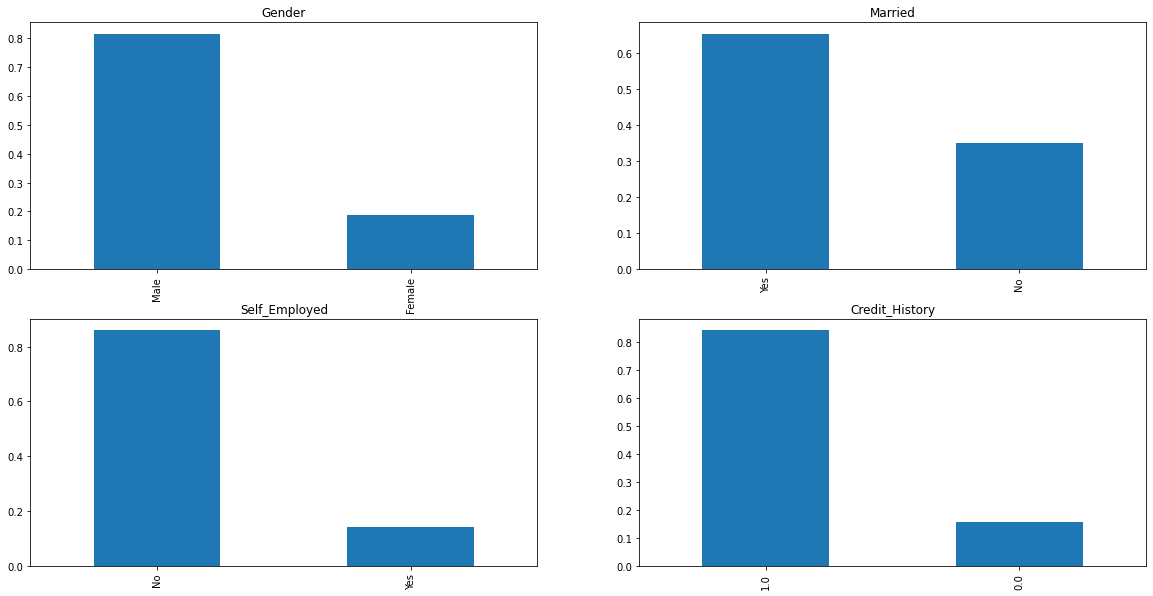

In [84]:
plt.figure(figsize=(20,10))
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title= 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')
plt.show()

### Conclusion 
- 80 % are male
- 65 % are married
- 15% only are self-employed
- 85 % have repaid debts ( got a good credit history)

# # Visualisation (bar plot) ordinal variable
(dane porządkowe)

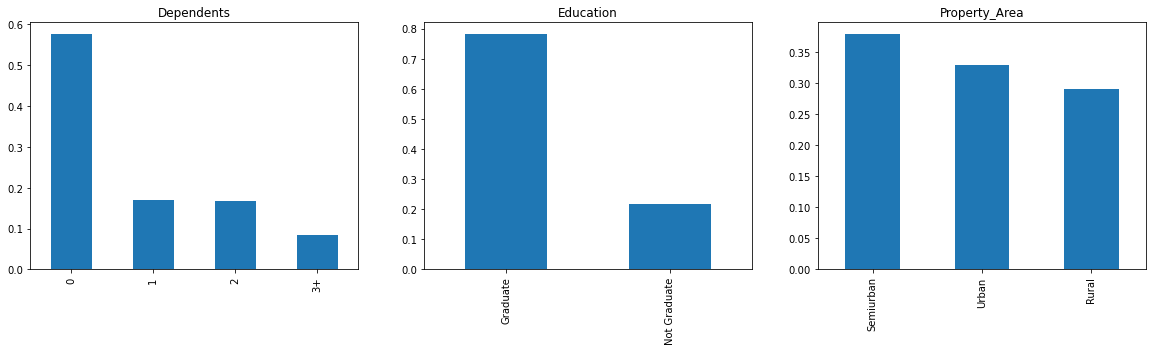

In [97]:

plt.figure(figsize=(20,10))
plt.subplot(231)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Dependents')
plt.subplot(232)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(233)
train['Property_Area'].value_counts(normalize = True).plot.bar(title= 'Property_Area')

plt.show()

Conclusions:
- above 50% dont have any dependends (nie ma osób na utrzymaniu)
- 75 % have a graduate education
- most of the applicants are from semiurban area (małe miasta)
    

# # Numerical (distribution) variable
ApplicantIncome, CoapplicantIncome, LoanAmount, LoanAmount_Term

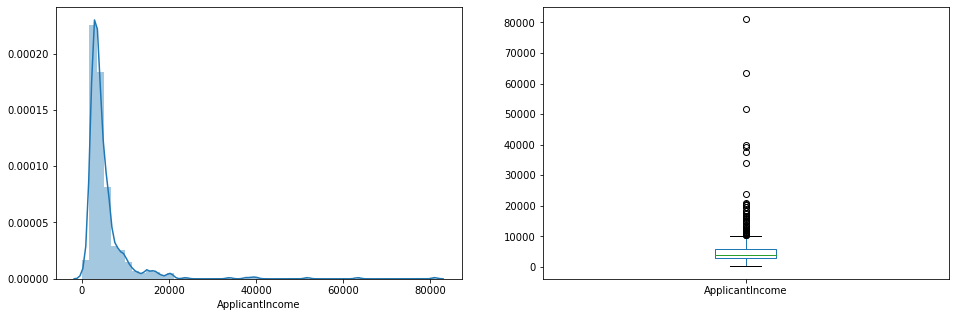

In [121]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Conclusion: ApplicantIncome - has not normally distribution(towards left). There is a lot outliers.

Lets try segregate ApplicantIncome by Education

Text(0.5, 0.98, '')

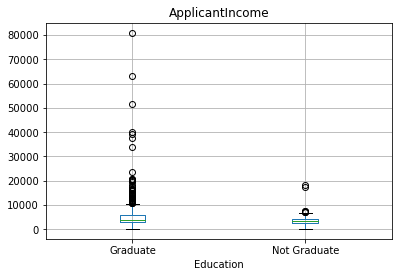

In [125]:
train.boxplot(column = "ApplicantIncome", by = "Education")
plt.suptitle("")


Conclusion: there is more outliers in graduates applicants

### CoapplicantIncome  distribution

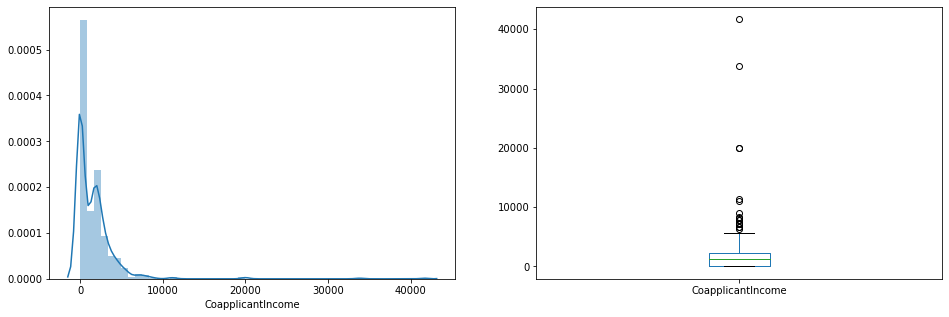

In [126]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Conclusion: CoapplicantIncome - has not normally distribution. There is a lot of outliers as well.

### LoanAmount distribution

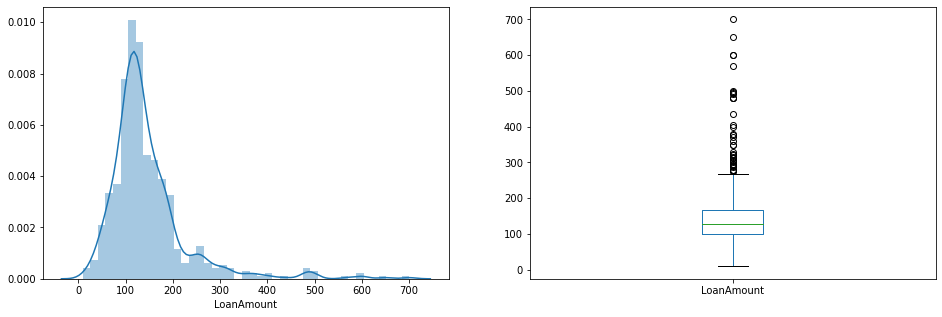

In [127]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

Conclusion: LoanAmount - is nearly normally distribution but there is a lot of outliers.

## 5 EDA Bivariate analisys

In [ ]:
Correlation with all numerical variable

In [130]:
matrix = train.corr()
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


Conclusion: The most correlations are:
ApplicantIncome - LoanAmount
ApplicantIncome - CoapplicantIncome
LoanAmount - CoapplicantIncome


# =------------------------------------------------------------------------

In [136]:
#--------------------------------------------------------------------------
# Credit_History - Loan_Status ************** NIE WIEM JAK ZROBIĆ TĘ KORELACJĘ?????
Credit_History = pd.crosstab(train["Credit_History"], train["Loan_Status"])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [137]:
matrix = train.corr()
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [138]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# --------------------------------------------------------------------------------------

# 6. Missing Value & outliers
Brak wartosci i wartosci odstajace


In [140]:
# liczba brakujących wartości
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Methods to fill missing values:
for numerical data- imputation using mean or median
for categorical data - imputation using mode


In [142]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [143]:
# to fill missing valuesbin  Loan_Amount_Term we first take a look at the values count
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [144]:
# 360 is the most repete for Loan_Amount_Term, we use mode of this
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [145]:
# for numerical data - LoanAmount- we could use mean or median as a fill data'
# We decide use median , because it is many outliers in LoanAmount 
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [146]:
#check  train 
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [147]:
# Fill missing values at test dataset   (as we done in train dataset)
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [148]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace = True)

test['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

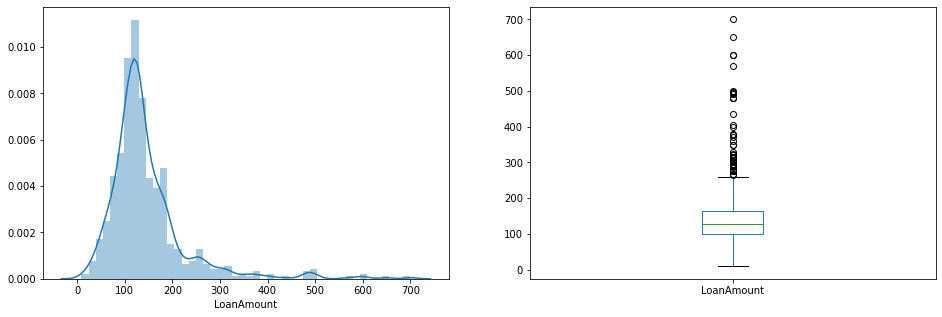

In [149]:
# LoanAmount - data transformation - because is it not normal distribution
#(right skewness- as we see - a lot of outliers)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
# we need remove outliers from our datasets (train & test)
# by doing the log transformation (it reduced larger values the most)
# our distribution will be similar to normal


In [150]:
train['LoanAmount_log']= np.log(train['LoanAmount']) 
test['LoanAmount_log']= np.log(test['LoanAmount'])

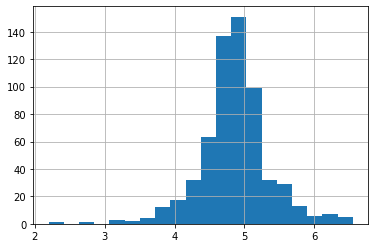

In [152]:
train['LoanAmount_log'].hist(bins = 20)